# 🧪 Exercise 6 and 7:

This notebook explores core probability and probability distributions concepts using the CICIDS2017 dataset. We will treat the network monitoring process as an experiment and define various events, compute probabilities, conditional probabilities, and use Bayes' Theorem to evaluate risk.

The file Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv is one of the labeled flow-level traffic logs from the CICIDS2017 dataset. It was generated by the Canadian Institute for Cybersecurity as part of their Intrusion Detection System (IDS) benchmarking project. Here's a structured description of the dataset:

🔢 Size: 225,745 rows × 79 columns (≈77.12 MB)
📅 Scenario Date: Friday Afternoon
📌 Attack Type Simulated: DDoS (Distributed Denial of Service)
🧪 Data Source: CICFlowMeter from raw PCAPs

Each row represents a single network flow — that is, a unidirectional sequence of packets between two IP/Port pairs over a transport-layer protocol within a timeout window.

| Category                 | Examples (Columns)                                                     | Description                                     |
| ------------------------ | ---------------------------------------------------------------------- | ----------------------------------------------- |
| 🧭 Flow Identifiers      | `Destination Port`, `Flow Duration`, `Label`                           | Flow metadata and attack labeling               |
| 📦 Packet Statistics     | `Total Fwd Packets`, `Total Backward Packets`, `Fwd Packet Length Max` | Counts and lengths of packets in each direction |
| ⏱ Inter-arrival Times    | `Flow IAT Mean`, `Fwd IAT Total`, `Bwd IAT Max`                        | Time between packets (IAT = Inter-Arrival Time) |
| 🚩 TCP Flags             | `SYN Flag Count`, `ACK Flag Count`, `FIN Flag Count`                   | Transport-level signal flags                    |
| 📈 Flow Rates            | `Flow Bytes/s`, `Flow Packets/s`, `Fwd Packets/s`                      | Throughput and packet rate                      |
| 🧮 Header/Segment Stats  | `Fwd Header Length`, `Avg Fwd Segment Size`, `Init_Win_bytes_forward`  | TCP/IP header info                              |
| 🧪 Statistical Features  | `Packet Length Mean`, `Packet Length Std`, `Idle Mean`, `Active Min`   | Derived statistics of activity and idle periods |
| 🏷 Labels (Ground Truth) | `Label`                                                                | BENIGN or DDoS attack flow                      |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load dataset
file_path = "./Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df = pd.read_csv(file_path)

In [4]:
# Show a sample
print("Sample data:")
df.head()

Sample data:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
# Quick clean-up of column names
df.columns = df.columns.str.strip()

### Section 1 (probability):

#### ✅ Task for students:
Briefly define what an experiment and event mean in this network monitoring context.

In [6]:
Your_answer = "..."

#### ✅ Task for students:
What is sample space? what is the size of main events?

In [2]:
# Your code here
...

#### ✅ Task for students:
Estimate the probability of attack and the probability of getting a benign traffic upon a check|

In [3]:
# Your code here
...

#### ✅ Task for students:
Based on the sample estimate conditional Probability P(Attack | Destination Port = 80)

In [4]:
# Your code here
...

#### ✅ Task for students:
Calculate P(Destination Port = 80 | Attack) using Bayes’ Theorem

In [53]:
# directly from the dataframe
attacks = df[df['Label'] != 'BENIGN']

p_port_80_given_attack = (attacks['Destination Port'] == 80).mean()

print(f"P(Destination Port = 80 | Attack) = {p_port_80_given_attack}")

P(Destination Port = 80 | Attack) = 0.999976567442805


In [ ]:
# Using Bayes’ Theorem
# Your code here
...

#### 👉 Conclusion: 
If a flow is headed to port 80, there’s a ~93.5% chance it’s an attack in this dataset — very high because this file contains mostly DDoS traffic aimed at port 80.

#### ✅ Task for students:
Choose 'Flow Duration'>1,000,000 μs and formulate a Bayes theorem-based question. i.e. compute P(Attack∣Long Duration) 

In [70]:
# Define long duration threshold (in microseconds)
duration_threshold = 1_000_000

# Your code here
...

P(Long Duration)=0.5570045848191544
P(Long Duration | Attack)= 0.6613995485327314
P(Attack | Long Duration)= 0.6734239428666863


#### 👉 Conclusion:
If you observe a long-duration flow, there is a ~67% chance that it is an attack — higher than the base rate of 56.7%.

### Section 2 (bionomial distribution):

#### ✅ Task for students:
- Suppose you want to simulate attack or benign events out of 10 random flows.
-  can we assume this is a bionomial experiment and why?
- Estimate the attack rate p from the dataset and model it as a binomial distribution to find probability of getting exactly 7 attacks in our simulation?
- When can we use a normal distribution to approximate such a binomial experiment?

In [ ]:
from scipy import stats

attack_prob = (df['Label'] != 'BENIGN').mean()
print(f"Estimated attack probability (p): {attack_prob:.4f}")


n_trials = 10
k_success = 7

# your code here: use stats.binom.pmf




👉 **Can we assume this is a binomial experiment and why?**

Your answer


👉  **When can we use a normal distribution to approximate such a binomial experiment?**

Your answer


### Section 3 (normal distribution):

#### ✅ Task for students:
- Choose a numerical feature 'Total Fwd Packets' and fit a normal distribution using MLE (Maximum Likelihood Estimation) using scipy stats model.
- Plot the histogram and overlay the fitted normal PDF. Does it match well?
- Does the normal curve align well with the histogram?
- Compare visually – are the tails and center well captured?
- Why might the fit not be perfect for real-world network data?
- Explain the shape of the data to your AI assistant and ask it to find a more suited distribution that can be used for the modeling.

In [ ]:
feature = 'Total Fwd Packets'

# Convert to numeric, coerce errors (e.g. "Infinity" → NaN), drop NaNs and infs
data = pd.to_numeric(df[feature], errors='coerce')
data = data[np.isfinite(data)]  # remove NaN, inf, -inf


# Your code here
# Fit a normal distribution to the data using MLE (more general than computing mean/std) using stats.norm.fit 



# Plot histogram and PDF


👉 Does the normal curve align well with the histogram?

Your answer

---
👉   Are the tails and center well captured?

Your answer

---

👉  Why might the fit not be perfect for real-world network data?

Your answer

---

👉   Explain the shape of the data to your AI assistant and ask it to find a more suited distribution that can be used for the modeling:

Your answer


#### ✅ Task for students:
- Choose a numerical feature 'Flow Duration' and plot its distribution.
- Comment on the shape (normal, skewed, multimodal?)
- Compute the skewness and the kurtosis.

In [ ]:
# Your code here
...

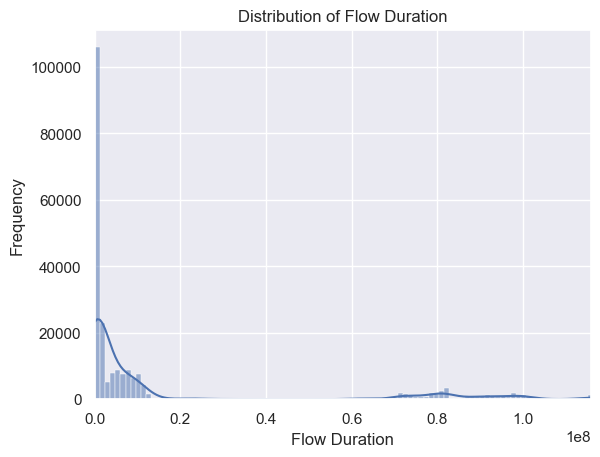

Skewness of Flow Duration: 1.94
Kurtosis of Flow Duration: 2.12


In [ ]:
# Your code here
...

In [ ]:
# Your interpretation here
Answer = "..."

### Section 4 (outliers):

#### ✅ Task for students:
Use IQR method to detect and count outliers in 'Flow Duration'.

Take a look on the Benig and Atrtack traffic when flow duration has an extreme value

In [108]:
# Your code here
...

Total outliers in Flow Duration: 37465
Outliers by label:
Label
DDoS      21915
BENIGN    15550
Name: count, dtype: int64


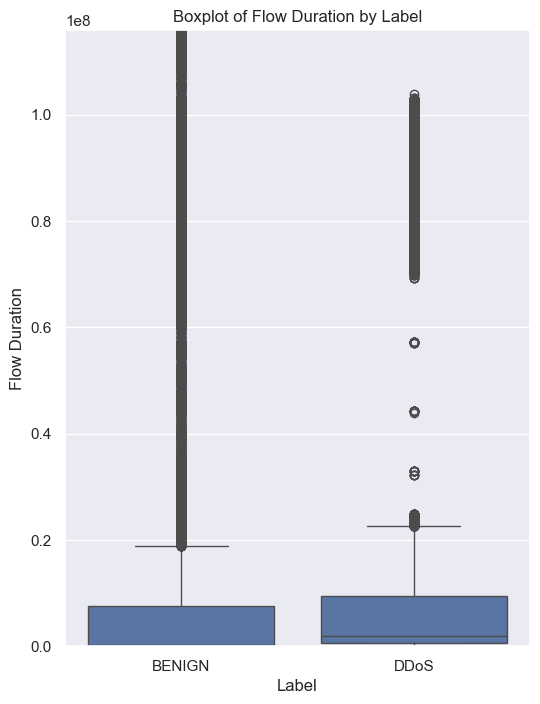

In [109]:
# Boxplot for visual confirmation
plt.figure(figsize=(6, 8))
sns.boxplot(x='Label', y=feature, data=df, showfliers=True)
plt.title("Boxplot of Flow Duration by Label")
plt.ylim(0, df[feature].quantile(0.99))
plt.show()

### Section 5 (CLT):

#### ✅ Task for students:
- In the following code, we sample different sample sizes and compute mean/std. 

- Do you expect the mean and the std. to change for each sample size? why do you think this is happening?

- What happens if you increase sample size?

In [110]:
sample_sizes = [10, 20, 50, 100, 250, 500, 750, 1000, 2000, 5000, 10000, 20000, 30000]
means = []
stds = []
column = 'Flow Bytes/s'

for size in sample_sizes:
    sample = df[column].dropna().sample(size, random_state=42)
    means.append(sample.mean())
    stds.append(sample.std())

In [111]:
df[column].dropna().mean()

np.float64(inf)

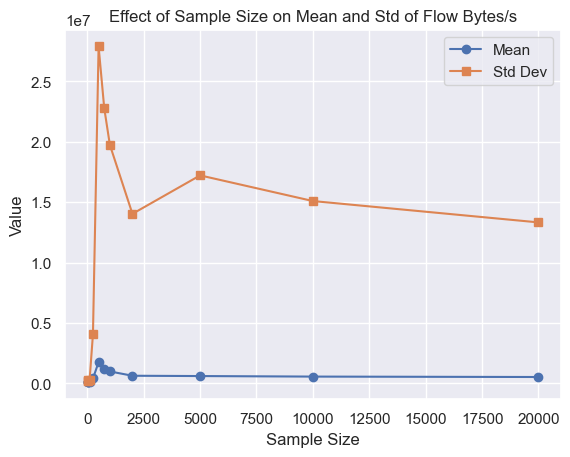

In [112]:
# Plot the trend
plt.plot(sample_sizes, means, marker='o', label='Mean')
plt.plot(sample_sizes, stds, marker='s', label='Std Dev')
plt.title("Effect of Sample Size on Mean and Std of Flow Bytes/s")
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Your interpretation here:
....

#### ✅ Task for students:
We will assume theat our dataset represent a population. In the following code we take repeated samples (1000 repeats)from the population, first with sample size of 10, 50, 500 and 1000  and plot the distribution of sample means.

##### Answer the following questions in a dedicated markdown cell.

- How does the shape of the sampling distribution change as n increases?

- Why is the distribution for n = 10 much more variable and irregular than the one for n = 500?

- Which sample size looks closest to a normal distribution? Explain why.

- Compare the standard deviation of the sample means vs. the standard deviation of the variable, and confirm that std of sample means < std of population (by √n rule).

- Compare the distribution of Flow duration vs. the different distributions of different sample means

In [ ]:

sample_sizes = [10, 50, 500, 1000]
column = 'Flow Duration'
data = df[column].dropna()

for sample_size in sample_sizes:
    sample_means = []
    for _ in range(1000):
        sample = data.sample(sample_size, replace=True)
        sample_means.append(sample.mean())

    print(f"Mean of sample means: {np.mean(sample_means):.2f}")
    print(f"Std of sample means: {np.std(sample_means):.2f}")
    
    plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Sampling Distribution of the Mean (Flow Duration, n={sample_size})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

#### Interpretation:
👉 What you should observe:

Your answer here


👉 How does the shape of the sampling distribution change as n increases?

Your answer here

---

👉 Why is the distribution for n = 10 more irregular than n = 500?

Your answer here

---

👉 Which sample size looks most normal? Why?

Your answer here

---

👉 Compare std of sample means vs. population std

Your answer here

---


👉 Compare Flow Duration vs. sample means distributions

Your answer here


#### ✅ Task for students:

overlay the sampling distribution of means (when n=50) with normal distribution

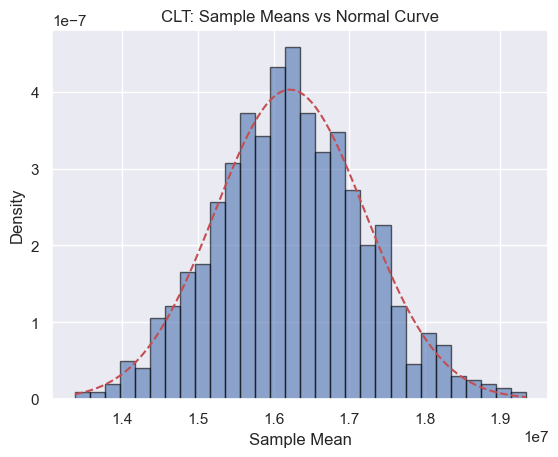

In [ ]:
# Your code here
...